In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

cap = cv2.VideoCapture('../Downloads/top.mp4')
ret,current_frame = cap.read()
previous_frame = current_frame

#SURF

surf = cv2.xfeatures2d.SURF_create()

previous_frame_gray = cv2.cvtColor(previous_frame, cv2.COLOR_BGR2GRAY)
kp1,des1 = surf.detectAndCompute(previous_frame_gray,None)

#LISTS
average = []
temp = 0

#CHECKING IF FRAME IS OPENED OR NOT

if cap.isOpened() == False:
    print('ERROR FILE NOT FOUND OR WRONG CODEC USED!')  
    
while(cap.isOpened()):
    if ret == True:
       
        current_frame_gray = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)
        
       
        #TAKING REFERENCE FRAME
        
        kp2,des2 = surf.detectAndCompute(current_frame_gray,None)
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(des1,des2,k=2)
        good = []

        # LESS DISTANCE == BETTER MATCH

        #RATIO MATCH1 < 75% MATCH2
        for match1,match2 in matches:
            # IF MATCH1 DISTANCE IS LESS THAN 75% OF MATCH2 DISTANCE
            # THEN DESCRIPTOR WAS A GOOD MATCH , LET'S KEEP IT!
            if match1.distance < 0.75*match2.distance:
                good.append(match1)
                
                
        list_kp1 = []
        list_kp2 = []
      
        for match1 in good:
            
            img1_idx = match1.queryIdx
            img2_idx = match1.trainIdx

            (x1, y1) = kp1[img1_idx].pt
            (x2, y2) = kp2[img2_idx].pt

            list_kp1.append((x1, y1))
            list_kp2.append((x2, y2))
                
        i=0
        displacement = []
        
        for i in range(10):
            p1 = list_kp1[i]
            p2 = list_kp2[i]
            distance = math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )
            if distance > 5 :
                displacement.append(distance)
        
        #AVERAGE
        if len(displacement)>0: 
            avg = sum(displacement)/len(displacement)
        
        else :
            avg = 0
        
        average.append(avg)             
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break
            
    else :
        break
    if temp == 10:
        previous_frame = current_frame.copy()
        previous_frame_gray = cv2.cvtColor(previous_frame, cv2.COLOR_BGR2GRAY)
        kp1,des1 = surf.detectAndCompute(previous_frame_gray,None)
        temp = 0
    
    elif temp<10:
        temp += 1
        
    ret , current_frame = cap.read()

    
print(average)

    
cap.release()
cv2.destroyAllWindows()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5.4869884829939215, 5.496520778878813, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5.263522848810458, 5.263522848810458, 5.262796580182143, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5.0029999998002195, 5.002993027976556, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28.375303481819042, 28.376335897986188, 28.58532751649289, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 92.02895617814633, 92.02419900108615, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5.459956123988717, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15.328390351266988, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 81.2948848403258, 81.2948848403258, 43.698431045812775, 81.29079869003355, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 203.6023899387022, 203.6023899387022, 0, 0, 0, 0, 0, 0, 152.89320922235763, 0, 0, 0, 152.4454231164555, 152.44542311645

In [39]:
len(average)

895

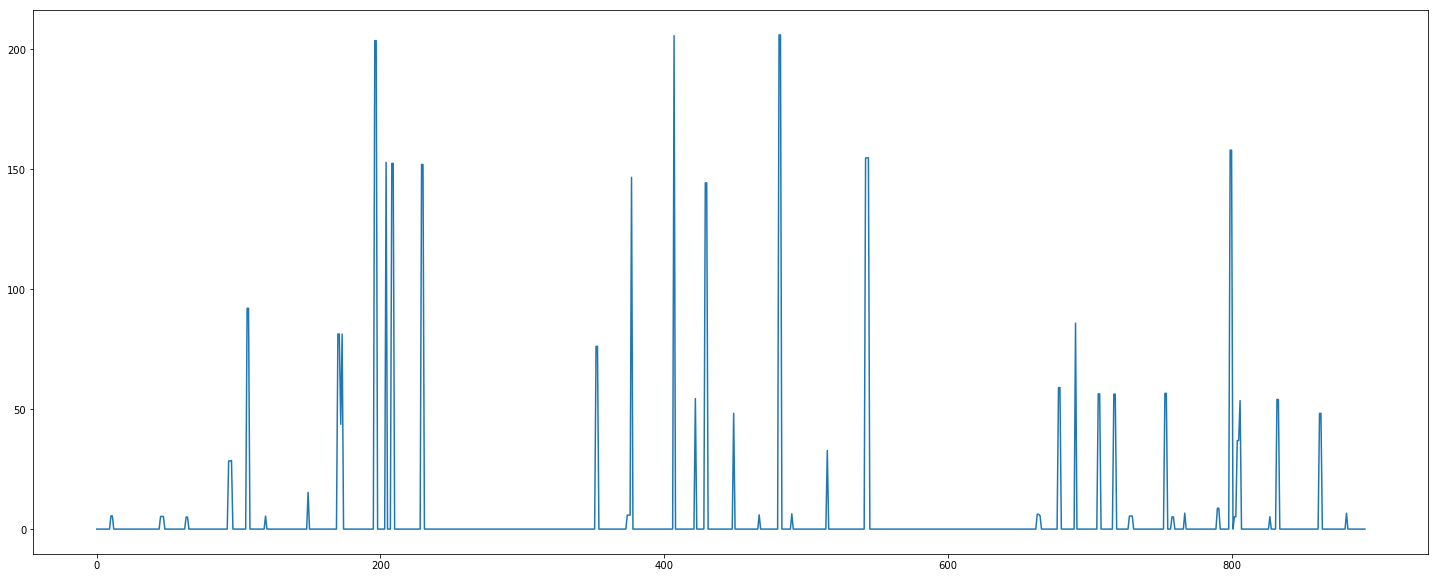

In [40]:
plt.figure(figsize=(25,10))
display(plt.plot(average ) )

In [41]:
t = len(average)
sum_average =[]
sum_avg = 0
i = 0
k=0
for i in range(t):
    if k<2:
        sum_avg = sum_avg + average[i-1]
        k += 1
    elif k>=2:
        sum_average.append(sum_avg+average[i-1])
        sum_avg = 0
        k=0
print(sum_average)

[0, 0, 0, 5.4869884829939215, 5.496520778878813, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10.527045697620917, 5.262796580182143, 0, 0, 0, 0, 10.005993027776775, 0, 0, 0, 0, 0, 0, 0, 0, 0, 56.751639379805226, 28.58532751649289, 0, 0, 92.02895617814633, 92.02419900108615, 0, 0, 0, 5.459956123988717, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15.328390351266988, 0, 0, 0, 0, 0, 0, 206.2882007264644, 81.29079869003355, 0, 0, 0, 0, 0, 0, 203.6023899387022, 203.6023899387022, 0, 152.89320922235763, 152.4454231164555, 152.4454231164555, 0, 0, 0, 0, 0, 151.99340779704275, 151.99340779704275, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 76.16398724231361, 76.1769255001318, 0, 0, 0, 0, 0, 0, 17.44613610493692, 146.62229802046298, 0, 0, 0, 0, 0, 0, 0, 0, 0, 205.68945872249938, 0, 0, 0, 0, 54.41604204036189, 0, 288.6614187033897, 0, 0, 0, 0, 0, 0, 48.28246487029214, 0, 0, 0, 0, 0, 5.938181764274722, 0, 0, 0, 206.0052067534903, 205.9979929905792, 0, 6.359

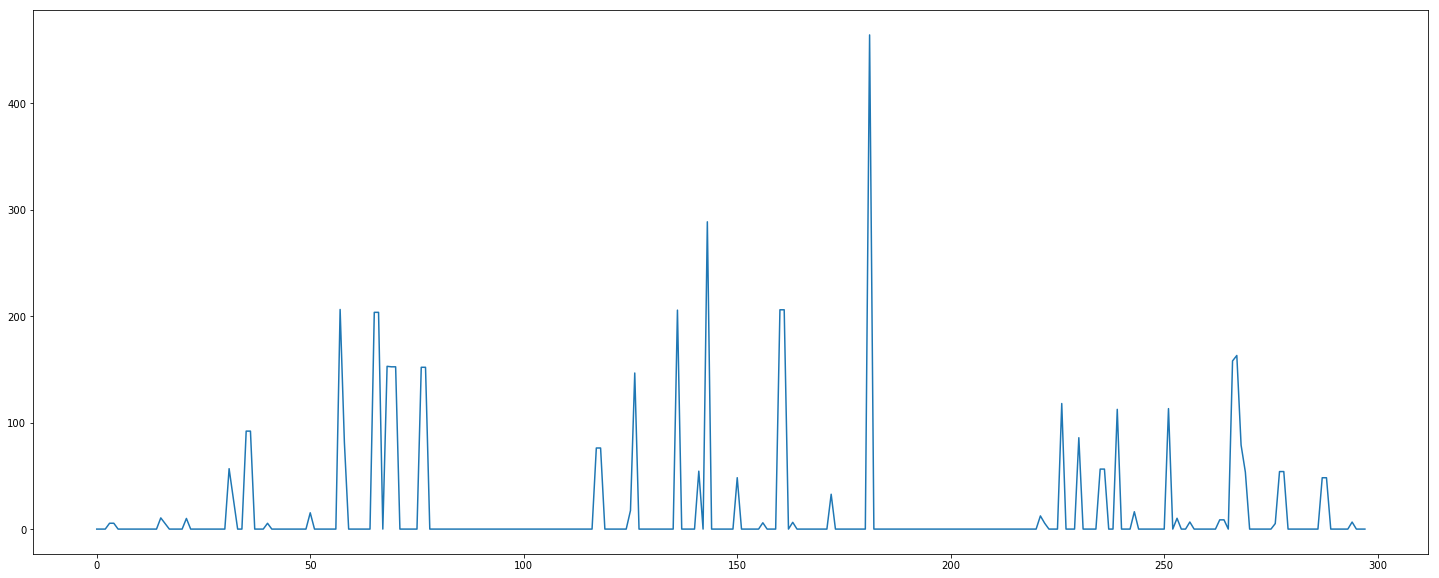

In [42]:
plt.figure(figsize=(25,10))
display(plt.plot(sum_average))